**Problem 1: Network Compression Using SVD**

Loading all the libraries

In [0]:
import tensorflow as tf
from tensorflow.python.framework import ops
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Loading the MNIST dataset

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
trainX, trainY, testX, testY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
print(trainY.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Define the architecture of the neural network

Learning rate=0.0008

In [0]:
tf.reset_default_graph()  # To reset all the parameters of the graph for every execution
tf.random.set_random_seed(0)
input_units=784   # Total number of input units
lr=tf.constant(.0008, dtype=tf.float32, name='learningRate')
hidden_units=1024   # Total number of hidden units
output_units=10    # Total number of output units
x=tf.placeholder(tf.float32,shape=[None,input_units])
y=tf.placeholder(tf.float32,shape=[None,output_units])

Randomly initialize the weights & biases for all the layers using He Initialization

In [4]:
w1 = tf.get_variable("W1", shape=[input_units, hidden_units], initializer=tf.initializers.he_normal())
b1 = tf.get_variable("b1", shape=[1,hidden_units], initializer=tf.initializers.he_normal())
w2 = tf.get_variable("W2", shape=[hidden_units, hidden_units], initializer=tf.initializers.he_normal())
b2 = tf.get_variable("b2", shape=[1,hidden_units], initializer=tf.initializers.he_normal())
w3 = tf.get_variable("W3", shape=[hidden_units, hidden_units], initializer=tf.initializers.he_normal())
b3 = tf.get_variable("b3", shape=[1,hidden_units], initializer=tf.initializers.he_normal())
w4 = tf.get_variable("W4", shape=[hidden_units, hidden_units], initializer=tf.initializers.he_normal())
b4 = tf.get_variable("b4", shape=[1,hidden_units], initializer=tf.initializers.he_normal())
w5 = tf.get_variable("W5", shape=[hidden_units, hidden_units], initializer=tf.initializers.he_normal())
b5 = tf.get_variable("b5", shape=[1,hidden_units], initializer=tf.initializers.he_normal())
w6 = tf.get_variable("W6", shape=[hidden_units, output_units], initializer=tf.initializers.he_normal())
b6 = tf.get_variable("b6", shape=[1,output_units], initializer=tf.initializers.he_normal())

Instructions for updating:
Colocations handled automatically by placer.


Feedforward network

In [0]:
a1=tf.nn.relu(x@w1+b1)  # 1st hidden layer
a2=tf.nn.relu(a1@w2+b2)  # 2nd hidden layer
a3=tf.nn.relu(a2@w3+b3)  # 3rd hidden layer
a4=tf.nn.relu(a3@w4+b4)  # 4th hidden layer
a5=tf.nn.relu(a4@w5+b5)  # 5th hidden layer
yhat=tf.nn.softmax(a5@w6+b6)  # output layer

Training the DNN:-

Loss function : Cross-entropy

Optimizer : Adam Optimizer

In [6]:
loss=tf.reduce_sum(-y*tf.log(yhat))  # Cross-entropy
train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)  # Adam Optimization
sess=tf.InteractiveSession()
tf.global_variables_initializer().run()
maxEpoch=251  # Total number of epochs
for i in range(maxEpoch):
  errt, _=sess.run([loss,train_step], feed_dict={x:trainX, y: trainY})
  if not i%25:
    print('Epoch number:',i,' Loss:',errt)
print(' Accuracy:',sess.run(tf.reduce_mean(tf.cast(tf.equal(tf.argmax(yhat,axis=1),tf.argmax(y,axis=1)), tf.float32)), feed_dict={x: testX, y: testY})*100,'%')
w1_baseline,w2_baseline,w3_baseline,w4_baseline,w5_baseline,w6_baseline=sess.run([w1,w2,w3,w4,w5,w6],feed_dict={x:trainX})
b1_baseline,b2_baseline,b3_baseline,b4_baseline,b5_baseline,b6_baseline=sess.run([b1,b2,b3,b4,b5,b6],feed_dict={x:trainX})

Epoch number: 0  Loss: 253220.66
Epoch number: 25  Loss: 72198.85
Epoch number: 50  Loss: 16597.188
Epoch number: 75  Loss: 8938.847
Epoch number: 100  Loss: 5044.214
Epoch number: 125  Loss: 2881.9004
Epoch number: 150  Loss: 7846.703
Epoch number: 175  Loss: 3438.2666
Epoch number: 200  Loss: 1948.709
Epoch number: 225  Loss: 1004.2184
Epoch number: 250  Loss: 450.9746
 Accuracy: 97.69999980926514 %


SVD on all the weight matrices

In [0]:
u1, s1, v1 = np.linalg.svd(w1_baseline,full_matrices=False)
u2, s2, v2 = np.linalg.svd(w2_baseline,full_matrices=False)
u3, s3, v3 = np.linalg.svd(w3_baseline,full_matrices=False)
u4, s4, v4 = np.linalg.svd(w4_baseline,full_matrices=False)
u5, s5, v5 = np.linalg.svd(w5_baseline,full_matrices=False)

Function to perform feed forward using the SVD approximated weights

In [0]:
def getOutput(w11,w12,w21,w22,w31,w32,w41,w42,w51,w52,X):
  a1=np.maximum(np.dot(np.dot(X,w11),w12)+b1_baseline,0)  # 1st Hidden layer
  a2=np.maximum(np.dot(np.dot(a1,w21),w22)+b2_baseline,0)  # 2nd Hidden layer
  a3=np.maximum(np.dot(np.dot(a2,w31),w32)+b3_baseline,0)  # 3rd Hidden layer
  a4=np.maximum(np.dot(np.dot(a3,w41),w42)+b4_baseline,0)  # 4th Hidden layer
  a5=np.maximum(np.dot(np.dot(a4,w51),w52)+b5_baseline,0)  # 5th Hidden layer
  a6=np.exp(np.dot(a5,w6_baseline)+b6_baseline)
  return np.argmax(a6/np.sum(a6,axis=1).reshape((-1,1)),axis=1)  # Output layer

Calculate the accuracy of all the DNNs with weights approximated using SVD with dimension D=10,20,50,100,200

In [9]:
D=[10,20,50,100,200]
accuracy=[]
for d in D:
  label=getOutput(u1[:,:d]*s1[:d],v1[:d],u2[:,:d]*s2[:d],v2[:d],u3[:,:d]*s3[:d],v3[:d],u4[:,:d]*s4[:d],v4[:d],u5[:,:d]*s5[:d],v5[:d],testX)
  accuracy.append(np.sum(label==np.argmax(testY,axis=1))*100/testY.shape[0])
  print('D:',d,' Accuracy:',accuracy[-1])

D: 10  Accuracy: 30.01
D: 20  Accuracy: 51.19
D: 50  Accuracy: 68.95
D: 100  Accuracy: 81.55
D: 200  Accuracy: 93.38


Calculate the accuracy of the DNN with weight approximated using SVD with full dimension

In [10]:
label=getOutput(u1*s1,v1,u2*s2,v2,u3*s3,v3,u4*s4,v4,u5*s5,v5,testX)
accuracy.append(np.sum(label==np.argmax(testY,axis=1))*100/testY.shape[0])
D.append(784)
print('Dfull Accuracy:',accuracy[-1])

Dfull Accuracy: 97.7


Plotting the graph of the accuracy of the DNN for different values of D

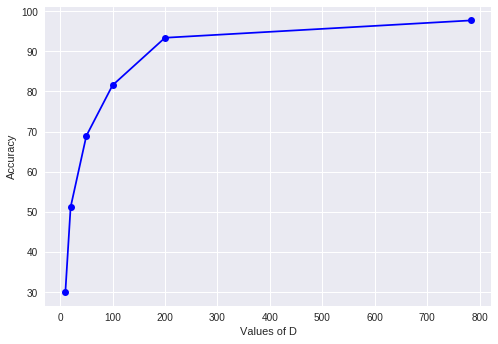

In [11]:
plt.plot(D,accuracy,'bo-')
plt.xlabel('Values of D')
plt.ylabel('Accuracy')
plt.show()
sess.close()

**Approach 1)** : Create a new DNN with SVD approximated weights

Initializating the weights of the DNN with the SVD approximated value of D=20

In [0]:
tf.reset_default_graph()  # To reset all the parameters of the graph for every execution
sess=tf.InteractiveSession()
d=20
U1 = tf.Variable(u1[:,:d]*s1[:d], name='U1')  # 1st Hidden layer
V1 = tf.Variable(v1[:d], name='V1')
B1 = tf.Variable(b1_baseline, name='B1')

U2 = tf.Variable(u2[:,:d]*s2[:d], name='U2')  # 2nd Hidden layer
V2 = tf.Variable(v2[:d], name='V2')
B2 = tf.Variable(b2_baseline, name='B2')

U3 = tf.Variable(u3[:,:d]*s3[:d], name='U3')  # 3rd Hidden layer
V3 = tf.Variable(v3[:d], name='V3')
B3 = tf.Variable(b3_baseline, name='B3')

U4 = tf.Variable(u4[:,:d]*s4[:d], name='U4')  # 4th Hidden layer
V4 = tf.Variable(v4[:d], name='V4')
B4 = tf.Variable(b4_baseline, name='B4')

U5 = tf.Variable(u5[:,:d]*s5[:d], name='U5')  # 5th Hidden layer
V5 = tf.Variable(v5[:d], name='V5')
B5 = tf.Variable(b5_baseline, name='B5')

W6 = tf.Variable(w6_baseline, name='W6')  # Output layer
B6 = tf.Variable(b6_baseline, name='B6')

Defining the placeholders of the DNN

In [0]:
lr=0.0005  # Learning rate
x=tf.placeholder(tf.float32,shape=[None,input_units])
y=tf.placeholder(tf.float32,shape=[None,output_units])

In [0]:
sess.run(tf.variables_initializer(var_list=[V1, U1, V2, U2, V3, U3, V4, U4, V5, U5, B1, B2, B3, B4, B5, W6, B6]))

Architecture of the new DNN

In [0]:
a1=tf.nn.relu(x@U1@V1+B1)  # 1st hidden layer
a2=tf.nn.relu(a1@U2@V2+B2)  # 2nd hidden layer
a3=tf.nn.relu(a2@U3@V3+B3)  # 3rd hidden layer
a4=tf.nn.relu(a3@U4@V4+B4)  # 4th hidden layer
a5=tf.nn.relu(a4@U5@V5+B5)  # 5th hidden layer
yhat=tf.nn.softmax(a5@W6+B6)  # output layer

Training the new DNN:

Learning rate=0.0005

Loss function=Cross-entropy

Optimizer=Adam Optimizer

In [16]:
temp = set(tf.global_variables())
loss=tf.reduce_sum(-y*tf.log(yhat))  # Cross-entropy
train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)  # Adam Optimization
tf.variables_initializer(set(tf.global_variables())-temp).run()
maxEpoch=306  # Total number of epochs
for i in range(maxEpoch):
  errt, _=sess.run([loss,train_step], feed_dict={x:trainX, y: trainY})
  if not i%50:
    print('Epoch number:',i,' Loss:',errt)
print('Accuracy:',sess.run(tf.reduce_mean(tf.cast(tf.equal(tf.argmax(yhat,axis=1),tf.argmax(y,axis=1)), tf.float32)), feed_dict={x: testX, y: testY})*100,'%')
sess.close()

Epoch number: 0  Loss: 78981.66
Epoch number: 50  Loss: 9273.109
Epoch number: 100  Loss: 6527.9746
Epoch number: 150  Loss: 5067.6733
Epoch number: 200  Loss: 3999.0254
Epoch number: 250  Loss: 3208.815
Epoch number: 300  Loss: 2648.535
Accuracy: 97.00000286102295 %


**Approach 2)** : Performing SVD at every iteration

In [0]:
def svd_approx(w, name=None):  
    with tf.name_scope(name, "SVDApprox", [w]) as name:
        return py_func(forward_func,[w],[np.float32],grad=backprop_func,name=name)

In [0]:
def py_func(func, inp, Tout, grad, stateful=True, name=None):
    rnd_name = 'PyFuncGrad'+ str(np.random.randint(0, 1E+8))  # Random name for the Gradient function of each weight
    tf.RegisterGradient(rnd_name)(grad)
    g=tf.get_default_graph()
    with g.gradient_override_map({"PyFunc": rnd_name}):   
        return tf.py_func(func, inp, Tout, stateful=stateful, name=name)

In [0]:
def forward_func(w):  # Function that computes SVD of the weight matrix & reconstructs the weight matrix using just the first 20 components
  u, s, v = np.linalg.svd(w,full_matrices=False)
  return np.dot(u[:,:d]*s[:d],v[:d])

In [0]:
def backprop_func(op,grad):  # Function to define the custom gradient of the loss function w.r.t each weight
  return grad * op.inputs[0]

In [0]:
tf.reset_default_graph()  # To reset all the parameters of the graph for every execution
w1 = tf.Variable(w1_baseline, name='w1')
b1 = tf.Variable(b1_baseline, name='b1')

w2 = tf.Variable(w2_baseline, name='w2')
b2 = tf.Variable(b2_baseline, name='b2')

w3 = tf.Variable(w3_baseline, name='w3')
b3 = tf.Variable(b3_baseline, name='b3')

w4 = tf.Variable(w4_baseline, name='w4')
b4 = tf.Variable(b4_baseline, name='b4')

w5 = tf.Variable(w5_baseline, name='w5')
b5 = tf.Variable(b5_baseline, name='b5')

w6 = tf.Variable(w6_baseline, name='w6')
b6 = tf.Variable(b6_baseline, name='b6')

In [0]:
lr=0.00004  # Learning rate
x=tf.placeholder(tf.float32,shape=[None,input_units])
y=tf.placeholder(tf.float32,shape=[None,output_units])

In [0]:
sess=tf.InteractiveSession()
sess.run(tf.variables_initializer(var_list=[w1, w2, w3, w4, w5, b1, b2, b3, b4, b5, w6, b6]))  # Initialize all the weights & biases of the network

Architecture of the neural network

In [24]:
a1=tf.nn.relu(x@svd_approx(w1)[0]+b1)  # 1st hidden layer
a2=tf.nn.relu(a1@svd_approx(w2)[0]+b2)  # 2nd hidden layer
a3=tf.nn.relu(a2@svd_approx(w3)[0]+b3)  # 3rd hidden layer
a4=tf.nn.relu(a3@svd_approx(w4)[0]+b4)  # 4th hidden layer
a5=tf.nn.relu(a4@svd_approx(w5)[0]+b5)  # 5th hidden layer
yhat=tf.nn.softmax(a5@w6+b6)  # output layer

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    


In [25]:
temp = set(tf.global_variables())
loss=tf.reduce_sum(-y*tf.log(yhat))  # Cross-entropy
train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)   # Adam Optimization
tf.variables_initializer(set(tf.global_variables())-temp).run()
maxEpoch=1001  # Total number of epochs
for i in range(maxEpoch):
  errt,_=sess.run([loss,train_step], feed_dict={x:trainX, y: trainY})
  if not i%50:
    print('Epoch number:',i,' Loss:',errt)
print('Accuracy:',sess.run(tf.reduce_mean(tf.cast(tf.equal(tf.argmax(yhat,axis=1),tf.argmax(y,axis=1)), tf.float32)), feed_dict={x: testX, y: testY})*100,'%')
sess.close()

Epoch number: 0  Loss: 78981.66
Epoch number: 50  Loss: 36530.004
Epoch number: 100  Loss: 29784.207
Epoch number: 150  Loss: 26823.656
Epoch number: 200  Loss: 24652.156
Epoch number: 250  Loss: 22742.342
Epoch number: 300  Loss: 21121.076
Epoch number: 350  Loss: 19796.074
Epoch number: 400  Loss: 18713.27
Epoch number: 450  Loss: 17866.656
Epoch number: 500  Loss: 17344.678
Epoch number: 550  Loss: 16929.03
Epoch number: 600  Loss: 16457.252
Epoch number: 650  Loss: 16035.494
Epoch number: 700  Loss: 15597.636
Epoch number: 750  Loss: 15400.366
Epoch number: 800  Loss: 15204.808
Epoch number: 850  Loss: 15062.45
Epoch number: 900  Loss: 14885.204
Epoch number: 950  Loss: 14675.687
Epoch number: 1000  Loss: 14638.802
Accuracy: 91.97999835014343 %
